## Preliminary steps

<b>Starting Jupyter Notebook using command</b><br>
>pysparknb

<b>Copying insurance.csv file to hadoop file system using command</b><br>
>hadoop fs -copyFromLocal /home/ashok/Documents/cdata/insurance.csv

## Accessing insurance.csv file

In [1]:
# Importing Libraries to start Spark session and perform EDA on the dataset
from pyspark.sql import SparkSession

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating Spark Session
spark = SparkSession.builder.appName('Question2').getOrCreate()

In [4]:
# Reaading the csv file and storing it in the dataframe
df = spark.read.csv('insurance.csv', header=True, inferSchema=True)

## Exploratory Data Analysis

In [5]:
# Overview of dataset
df.show(5)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
+---+------+------+--------+------+---------+-----------+
only showing top 5 rows



The dataset shows columns such as age, sex, bmi, children, smoker, region, charges

In [6]:
# Printing the schema of all columns in the dataset
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [7]:
# Reading the column names
df.columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
# No. of columns in the dataset
len(df.columns)

7

In [9]:
# No. of rows in the dataset
df.count()

1338

In [10]:
# Obtaining the statistical summary of the columns in the dataset
df.describe().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



In [11]:
# Checking null values
from pyspark.sql.functions import col, isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+---+--------+------+------+-------+
|age|sex|bmi|children|smoker|region|charges|
+---+---+---+--------+------+------+-------+
|  0|  0|  0|       0|     0|     0|      0|
+---+---+---+--------+------+------+-------+



+------+-----+
|smoker|count|
+------+-----+
|    no| 1064|
|   yes|  274|
+------+-----+



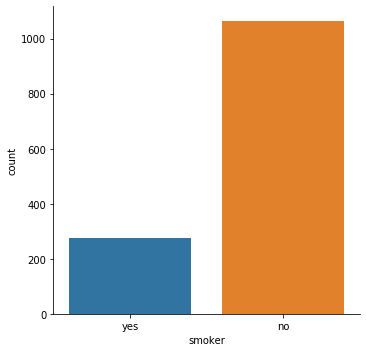

In [12]:
# counting data values by grouping by 'smoker' column
df.groupby('smoker').count().show()
dx = df.toPandas()
sns.catplot(x='smoker', kind='count', data=dx)

#### We can observe that majority of the people are non smokers (~80%)

+------+-----+
|   sex|count|
+------+-----+
|female|  662|
|  male|  676|
+------+-----+



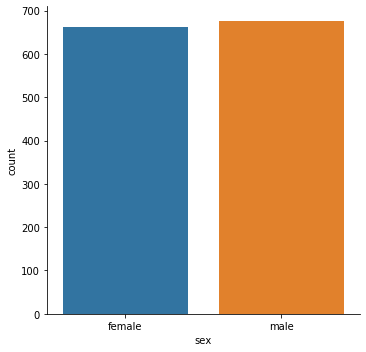

In [13]:
# counting data values by grouping by 'sex' column
df.groupby('sex').count().show()
sns.catplot(x='sex', kind='count', data=dx)

#### The dataset is balanced as it has accounted for equal number of males and females

+--------+-----+
|children|count|
+--------+-----+
|       1|  324|
|       3|  157|
|       5|   18|
|       4|   25|
|       2|  240|
|       0|  574|
+--------+-----+



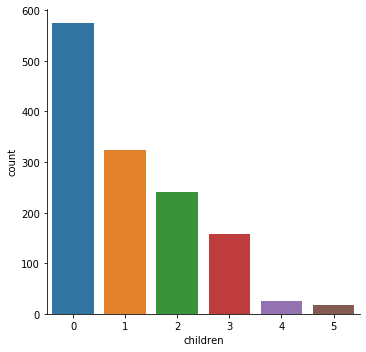

In [14]:
# counting data values by grouping by 'children' column
df.groupby('children').count().show()
sns.catplot(x='children', kind='count', data=dx)

#### Majority of people have children in the range of 0-3 (~97%)

BMI less than 25: 247
BMI greater than 25: 1091


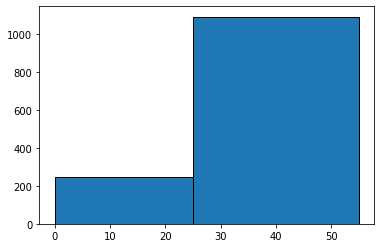

In [15]:
# counting data values by grouping by 'bmi' column
lt=0
mt=0
for i in dx['bmi']:
    if (i<=25):
        lt+=1
    else:
        mt+=1
print('BMI less than 25:', lt)
print('BMI greater than 25:', mt)
plt.hist(dx.bmi, bins=[0,25,55], edgecolor='black')
plt.show()

+---------+-----+
|   region|count|
+---------+-----+
|northwest|  325|
|southeast|  364|
|northeast|  324|
|southwest|  325|
+---------+-----+



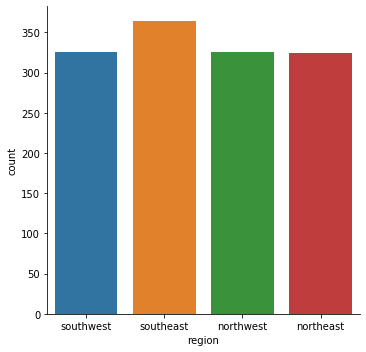

In [16]:
# counting data values by grouping by 'region' column
df.groupby('region').count().show()
sns.catplot(x='region', kind='count', data=dx)

#### There is almost equal representation of people from all the 4 regions

Text(0.5, 1.0, 'Age Vs Charges')

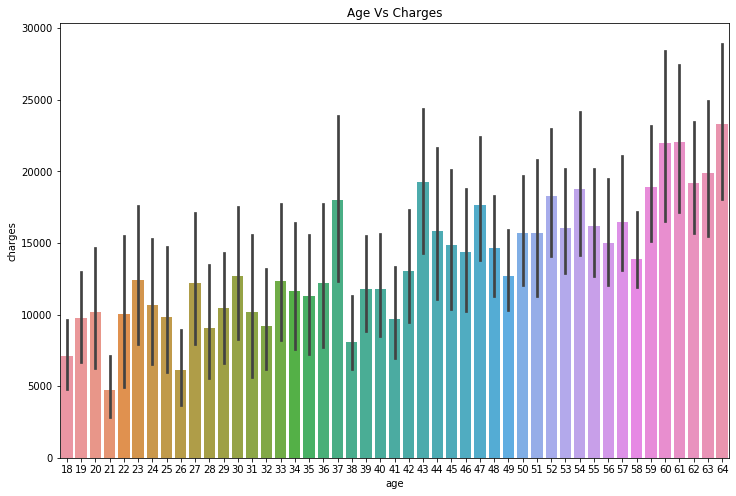

In [17]:
# Analying relation between age and charges
plt.figure(figsize=(12,8))
sns.barplot(x='age',y='charges', data=dx)
plt.title('Age Vs Charges')

#### We can conclude that as age increases the amount charged for insurance also increases

Mean charges for male: 13956.751177721886
Mean charges for female: 12569.57884383534


Text(0.5, 1.0, 'Sex Vs Charges')

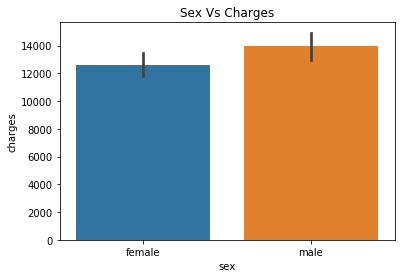

In [18]:
# Analying relation between sex and charges
mean_male,mean_female = dx['charges'][dx['sex'] == 'male'].mean(), dx['charges'][dx['sex'] == 'female'].mean()
print("Mean charges for male:",mean_male)
print("Mean charges for female:",mean_female)
sns.barplot(x='sex',y='charges', data=dx)
plt.title('Sex Vs Charges')

#### We can conclude that as charges for insurance remain same for male and female

In [19]:
# Analying relation between bmi and charges
mean_bml,mean_bmn = dx['charges'][dx['bmi'] > 25].mean(), dx['charges'][dx['bmi'] <= 25].mean()
print("Mean charges for BMI<=25:",mean_bml)
print("Mean charges for BMI>25:",mean_bmn)

Mean charges for BMI<=25: 13946.47603532447
Mean charges for BMI>25: 10284.29002518219


#### We can conclude that as charges for insurance are more for people with BMI greater than 25

Mean charges for 3 or less than 3 children: 11730.582377441857
Mean charges for more than 3 children: 13321.552083806173


Text(0.5, 1.0, 'No. of Children Vs Charges')

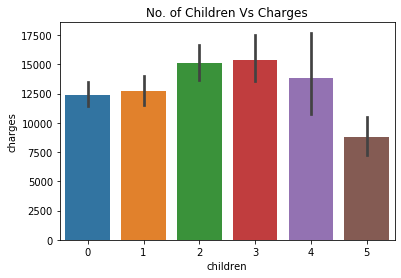

In [20]:
# Analying relation between children and charges
mean_chl,mean_chm = dx['charges'][dx['children'] > 3].mean(), dx['charges'][dx['children'] <= 3].mean()
print("Mean charges for 3 or less than 3 children:",mean_chl)
print("Mean charges for more than 3 children:",mean_chm)
sns.barplot(x='children',y='charges', data=dx)
plt.title('No. of Children Vs Charges')

#### We can conclude that as charges for insurance are more for people with more than 3 children

Mean charges for SW region: 12346.93737729231
Mean charges for SE region: 14735.411437609895
Mean charges for NW region: 12417.575373969228
Mean charges for NE region: 13406.3845163858


Text(0.5, 1.0, 'Region Vs Charges')

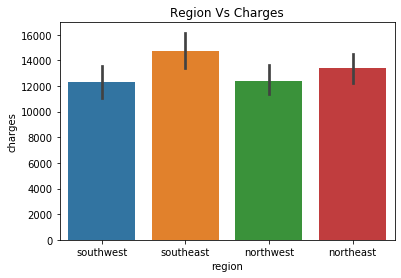

In [21]:
# Analying relation between region and charges
mean_sw,mean_se,mean_nw,mean_ne = dx['charges'][dx['region'] =='southwest'].mean(), dx['charges'][dx['region'] =='southeast'].mean(),dx['charges'][dx['region'] == 'northwest'].mean(),dx['charges'][dx['region'] =='northeast'].mean()
print("Mean charges for SW region:",mean_sw)
print("Mean charges for SE region:",mean_se)
print("Mean charges for NW region:",mean_nw)
print("Mean charges for NE region:",mean_ne)
sns.barplot(x='region',y='charges', data=dx)
plt.title('Region Vs Charges')

#### There is no major impact of region on charges

## Data preprocessing and transformation

In [22]:
# Separating categorical columns from the dataset
cat_cols = [c[0] for c in df.dtypes if c[1]=='string']
cat_cols

['sex', 'smoker', 'region']

In [23]:
# Separating numerical columns from the dataset
num_cols = [c[0] for c in df.dtypes if c[1]!='string']
num_cols = num_cols[0:3]
num_cols

['age', 'bmi', 'children']

In [24]:
# Copying to another dataframe for transformation and correlation plot
df1=df
df1.show(5)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
+---+------+------+--------+------+---------+-----------+
only showing top 5 rows



In [25]:
# Converting String to Integer values using StringIndexer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

cat_cols = [c[0] for c in df1.dtypes if c[1]=='string']

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df1) for column in cat_cols]
pipeline = Pipeline(stages = indexers)
df_r = pipeline.fit(df1).transform(df1)
df_r.show(5)

+---+------+------+--------+------+---------+-----------+---------+------------+------------+
|age|   sex|   bmi|children|smoker|   region|    charges|sex_index|smoker_index|region_index|
+---+------+------+--------+------+---------+-----------+---------+------------+------------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|      1.0|         1.0|         2.0|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|      0.0|         0.0|         0.0|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|      0.0|         0.0|         0.0|
| 33|  male|22.705|       0|    no|northwest|21984.47061|      0.0|         0.0|         1.0|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|      0.0|         0.0|         1.0|
+---+------+------+--------+------+---------+-----------+---------+------------+------------+
only showing top 5 rows



In [26]:
# Dropping columns with string values
df_r1 = df_r.drop('sex','smoker','region')
df_r1.show(5)

+---+------+--------+-----------+---------+------------+------------+
|age|   bmi|children|    charges|sex_index|smoker_index|region_index|
+---+------+--------+-----------+---------+------------+------------+
| 19|  27.9|       0|  16884.924|      1.0|         1.0|         2.0|
| 18| 33.77|       1|  1725.5523|      0.0|         0.0|         0.0|
| 28|  33.0|       3|   4449.462|      0.0|         0.0|         0.0|
| 33|22.705|       0|21984.47061|      0.0|         0.0|         1.0|
| 32| 28.88|       0|  3866.8552|      0.0|         0.0|         1.0|
+---+------+--------+-----------+---------+------------+------------+
only showing top 5 rows



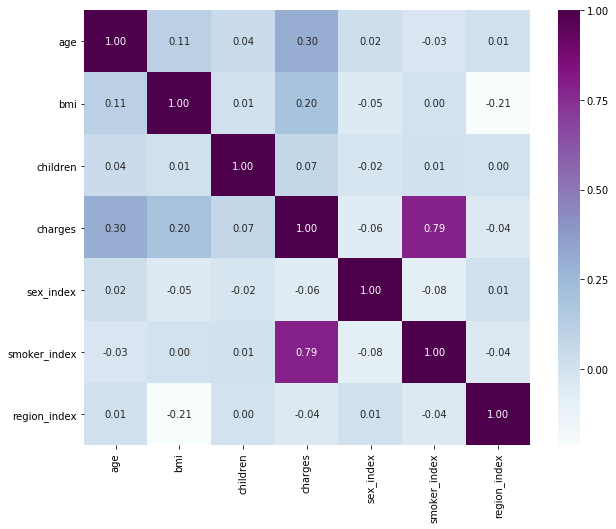

In [27]:
# Plotting correlation plot of processed dataset
data = df_r1.toPandas()
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu', annot = True , fmt ='.2f' , ax=ax)
plt.show()

In [28]:
# Combining all the steps performed above 
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
stages=[]
for cat_col in cat_cols:
    stringIndexer = StringIndexer(inputCol = cat_col, outputCol = cat_col + '_Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],outputCols = [cat_col +'_OHE'])
    stages += [stringIndexer, encoder]
assemblerInputs = [c + '_OHE' for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='asv_features')
stages += [assembler]
ss = StandardScaler(inputCol='asv_features', outputCol='features')
stages += [ss]

In [29]:
# Using Pipeline to transform data in stages as mentioned above
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df_pipetrans = pipelineModel.transform(df)
df_trans = df_pipetrans.select('features','charges')

In [30]:
# Displaying the final transformed and scaled dataset
df_trans = df_trans.withColumnRenamed('charges','label')
df_trans.show(10)

+--------------------+-----------+
|            features|      label|
+--------------------+-----------+
|(8,[4,5,6],[2.331...|  16884.924|
|[1.99936192649635...|  1725.5523|
|[1.99936192649635...|   4449.462|
|[1.99936192649635...|21984.47061|
|[1.99936192649635...|  3866.8552|
|(8,[1,2,5,6],[2.4...|  3756.6216|
|[0.0,2.4771235316...|  8240.5896|
|[0.0,2.4771235316...|  7281.5056|
|[1.99936192649635...|  6406.4107|
|(8,[1,3,5,6],[2.4...|28923.13692|
+--------------------+-----------+
only showing top 10 rows



In [31]:
# Performing train and test split of data
train_data, test_data = df_trans.randomSplit([0.7,0.3], seed = 1234)
print("No. of rows in train data: ", train_data.count())
print('Descriptive statistics of train data are as follows:')
train_data.describe().show()
print("No. of rows in test data: ", test_data.count())
print('Descriptive statistics of test data are as follows:')
test_data.describe().show()

No. of rows in train data:  940
Descriptive statistics of train data are as follows:
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|               940|
|   mean|13231.741211744686|
| stddev|11923.874866221442|
|    min|         1121.8739|
|    max|       62592.87309|
+-------+------------------+

No. of rows in test data:  398
Descriptive statistics of test data are as follows:
+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|               398|
|   mean|13361.779526932172|
| stddev|12553.523477657896|
|    min|         1136.3994|
|    max|       63770.42801|
+-------+------------------+



#### There is no major difference between train and test data values, so we can proceed with implementation of various regression models

## Implementing Linear Regression Model

In [32]:
# Importing LinearRegression and implementing the model
from pyspark.ml.regression import LinearRegression
lm = LinearRegression(featuresCol='features',labelCol='label')
lm_model = lm.fit(train_data)

In [33]:
# Checking coefficients and intercept values
print("Coefficients: " + str(lm_model.coefficients))
print("Intercept: " + str(lm_model.intercept))

Coefficients: [-142.88583891166073,-9389.293407178526,-647.3492651032038,-219.23242104268715,-539.3260633496448,3690.9653428791453,2132.21212682515,635.0621631706327]
Intercept: 11003.311091463907


#### Given that all the features are zero, we can conclude that the charges for insurance will be 11003.31/-

In [34]:
# Obtaining summary of trained model
trainSummary=lm_model.summary
print("MAE: ", trainSummary.meanAbsoluteError)
print("MSE: ", trainSummary.meanSquaredError)
print("RMSE: ", trainSummary.rootMeanSquaredError)
print("R2: ", trainSummary.r2)

MAE:  4156.93024116977
MSE:  35294045.11896927
RMSE:  5940.879153708588
R2:  0.7514985778969564


#### From the above values we can conclude that model can explain ~75% of the variability in the data

+--------------------+-------------------+----------+
|            features|         prediction|     label|
+--------------------+-------------------+----------+
|(8,[0,1,5,6],[1.9...|-2231.7923860140763| 1694.7964|
|(8,[0,1,5,6],[1.9...| -305.2379873113532| 1702.4553|
|(8,[0,1,5,6],[1.9...|  491.9569362897746| 1705.6245|
|(8,[0,1,5,6],[1.9...|  7204.609924282191|3268.84665|
|(8,[0,1,5,6],[1.9...|  8451.691516250417|12404.8791|
+--------------------+-------------------+----------+
only showing top 5 rows



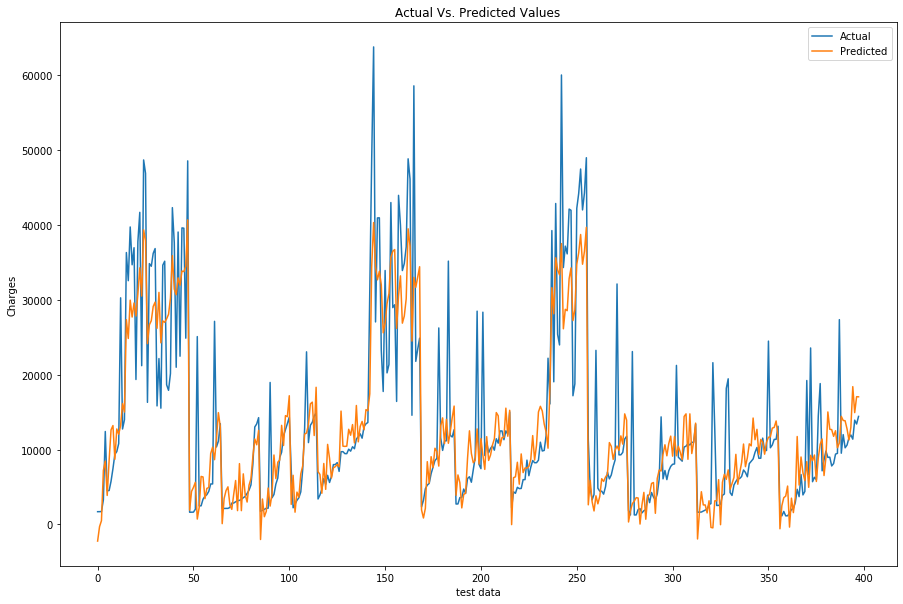

In [35]:
# Predicting the values using the model
lm_predictions = lm_model.transform(test_data)
lm_predictions.select('features','prediction','label').show(5)

df_m = lm_predictions.select('features','prediction','label').toPandas()

r = []
for i in range(len(df_m)):
    r.append(i)
r=np.array(r)


val1 = []
for i in range(len(df_m)):
    val1.append(df_m.label[i])
val1=np.array(val1)
               
val2 = []
for i in range(len(df_m)):
    val2.append(df_m.prediction[i])
val2=np.array(val2)
               
plt.figure(figsize=(15,10))
plt.plot(r,val1,label='Actual')
plt.plot(r,val2,label='Predicted')
plt.title('Actual Vs. Predicted Values')
plt.ylabel('Charges')
plt.xlabel('test data')
plt.legend()
plt.show()

R Squared on test data:  0.7470182227409288
+-------------------+
|          residuals|
+-------------------+
| 3926.5887860140765|
| 2007.6932873113533|
| 1213.6675637102253|
| -3935.763274282191|
| 3953.1875837495827|
|   635.547285202776|
| -3996.269435803795|
| -6861.378970676065|
|  -5750.11221889664|
|  665.2045208399668|
|-3022.7315667190505|
|-1242.5190363279307|
| 17040.477592003932|
| -3401.398571200194|
|-1029.6647738584616|
|  8969.620176018347|
|  7716.662894389647|
|  9775.734501282415|
|  6976.148428574383|
|   7382.71157684936|
+-------------------+
only showing top 20 rows



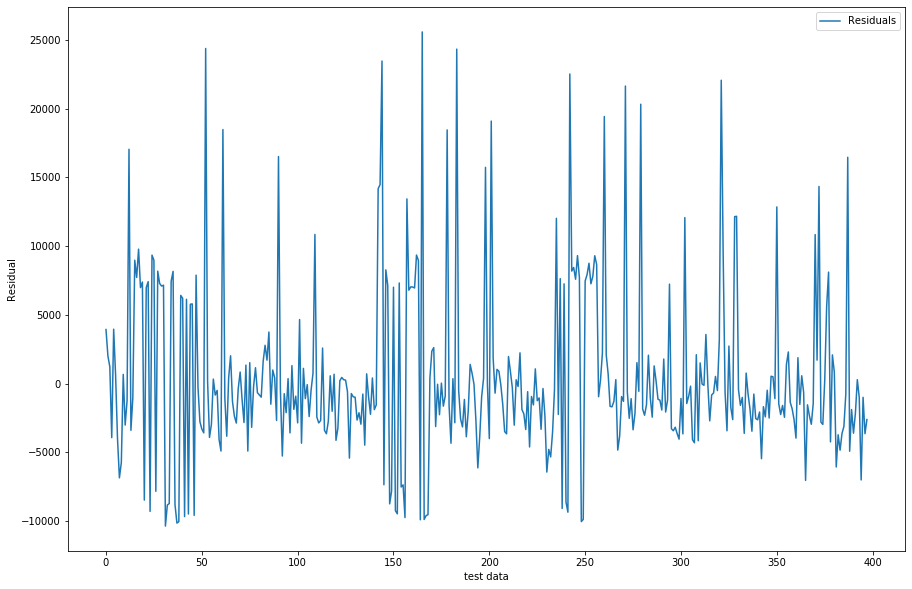

In [36]:
# Evaluating the model
from pyspark.ml.evaluation import RegressionEvaluator
lm_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", lm_evaluator.evaluate(lm_predictions)) 

# Plotting the residuals
res = lm_model.evaluate(test_data)
val_df=res.residuals.show()
val_df=res.residuals.toPandas()
val_df.head(5)

r=[]
for i in range(len(val_df)):
    r.append(i)
r=np.array(r)


val = []
for i in range(len(val_df)):
    val.append(val_df.residuals[i])
val=np.array(val)

plt.figure(figsize=(15,10))
plt.plot(r,val,label='Residuals')
plt.ylabel('Residual')
plt.xlabel('test data')
plt.legend()
plt.show()

In [37]:
# Displaying metrics of the model over test data
print("MAE: ", res.meanAbsoluteError)
print("MSE: ", res.meanSquaredError)
print("RMSE: ", res.rootMeanSquaredError)
print("R2: ", res.r2)


MAE:  4294.353080248329
MSE:  39767469.09471185
RMSE:  6306.1453436082365
R2:  0.7470182227409288


#### The overall accuracy of the Linear Regression Model is ~75%

#### Linear Regression Model Tuning

In [38]:
#Importing Libraries
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [39]:
# Defining pararmeter grid to construct a grid of parameters
paramGrid = (ParamGridBuilder().addGrid(lm.regParam,[0.01,1,2.0,5.0]).addGrid(lm.elasticNetParam,[0.0,0.5,1.0]).addGrid(lm.maxIter,[1,20]).build())

# Defining cross validation parameters 
cv = CrossValidator(estimator=lm, estimatorParamMaps=paramGrid, evaluator=RegressionEvaluator(), numFolds=3)

In [40]:
# Cross Validation implements all combinations to find the best model
cvModel = cv.fit(train_data)
cv_lm_predictions = cvModel.transform(test_data)
cv_lm_predictions.select('features','prediction','label').show(5)

+--------------------+-------------------+----------+
|            features|         prediction|     label|
+--------------------+-------------------+----------+
|(8,[0,1,5,6],[1.9...|-2222.4683002024212| 1694.7964|
|(8,[0,1,5,6],[1.9...| -302.8446866210925| 1702.4553|
|(8,[0,1,5,6],[1.9...|  491.4823258953202| 1705.6245|
|(8,[0,1,5,6],[1.9...|  7186.332160174432|3268.84665|
|(8,[0,1,5,6],[1.9...|   8432.10019003098|12404.8791|
+--------------------+-------------------+----------+
only showing top 5 rows



In [41]:
# Evaluating the tuned model using R Squared value
lm1_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", lm1_evaluator.evaluate(cv_lm_predictions))

R Squared on test data:  0.7471140245367027


#### After model tuning as well the accuracy has improved but it is still about ~75% only

## Implementing Gradient Boosted Tree Regression

In [42]:
# Importing LinearRegression and implementing the model
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'label')
gbt_model = gbt.fit(train_data)

In [43]:
# predicting the values using the model
gbt_predictions = gbt_model.transform(train_data)
gbt_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|2296.6932269414406| 1704.5681|
|(8,[0,1,5,6],[1.9...|2296.6932269414406|1704.70015|
|(8,[0,1,5,6],[1.9...|2334.7719687488566| 1708.0014|
|(8,[0,1,5,6],[1.9...| 2118.772587735037|1708.92575|
|(8,[0,1,5,6],[1.9...| 2224.640565642165|  1712.227|
+--------------------+------------------+----------+
only showing top 5 rows



In [44]:
# Obtaining summary of trained model
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mae')
print("MAE on train data: ", gbt_evaluator.evaluate(gbt_predictions))
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mse')
print("MSE on train data: ", gbt_evaluator.evaluate(gbt_predictions))
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='rmse')
print("RMSE on train data: ", gbt_evaluator.evaluate(gbt_predictions))
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on train data: ", gbt_evaluator.evaluate(gbt_predictions))

MAE on train data:  1699.1941184420498
MSE on train data:  8633302.941001374
RMSE on train data:  2938.248277630972
R Squared on train data:  0.9392138801020526


+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|1545.3034271059698| 1694.7964|
|(8,[0,1,5,6],[1.9...|1430.9438923650405| 1702.4553|
|(8,[0,1,5,6],[1.9...|1481.7082571291035| 1705.6245|
|(8,[0,1,5,6],[1.9...| 5956.973375185072|3268.84665|
|(8,[0,1,5,6],[1.9...| 5025.816614273152|12404.8791|
+--------------------+------------------+----------+
only showing top 5 rows



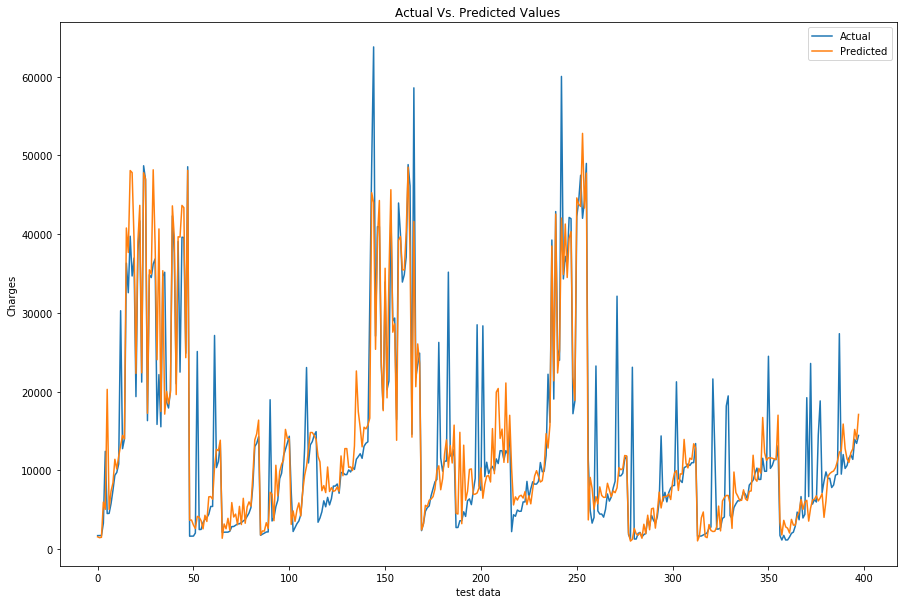

In [45]:
# predicting the values using the model
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('features','prediction','label').show(5)


df_m = gbt_predictions.select('features','prediction','label').toPandas()

r = []
for i in range(len(df_m)):
    r.append(i)
r=np.array(r)


val1 = []
for i in range(len(df_m)):
    val1.append(df_m.label[i])
val1=np.array(val1)
               
val2 = []
for i in range(len(df_m)):
    val2.append(df_m.prediction[i])
val2=np.array(val2)
               
plt.figure(figsize=(15,10))
plt.plot(r,val1,label='Actual')
plt.plot(r,val2,label='Predicted')
plt.title('Actual Vs. Predicted Values')
plt.ylabel('Charges')
plt.xlabel('test data')
plt.legend()
plt.show()

In [46]:
# Evaluating the model
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mae')
print("MAE on test data: ", gbt_evaluator.evaluate(gbt_predictions))
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mse')
print("MSE on test data: ", gbt_evaluator.evaluate(gbt_predictions))
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='rmse')
print("RMSE on test data: ", gbt_evaluator.evaluate(gbt_predictions))
gbt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", gbt_evaluator.evaluate(gbt_predictions))

MAE on test data:  2996.875831715136
MSE on test data:  30018082.374074448
RMSE on test data:  5478.876013752679
R Squared on test data:  0.8090391970679275


#### The overall accuracy of the Gradient Boosted Tree Regression Model is ~81%

#### Gradient Booster Tree Regression Model Tuning

In [47]:
# Defining pararmeter grid to construct a grid of parameters
paramGrid = (ParamGridBuilder().addGrid(gbt.maxDepth,[2,5]).addGrid(gbt.maxIter,[10,50]).build())
cv1 = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=RegressionEvaluator(), numFolds=3)

In [48]:
# Cross Validation implements all combinations to find the best model
cvModel1 = cv1.fit(train_data)
cv_gbt_predictions = cvModel1.transform(test_data)
cv_gbt_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|1483.0254096848403| 1694.7964|
|(8,[0,1,5,6],[1.9...|1483.0254096848403| 1702.4553|
|(8,[0,1,5,6],[1.9...| 2750.367892980438| 1705.6245|
|(8,[0,1,5,6],[1.9...| 5468.599221666977|3268.84665|
|(8,[0,1,5,6],[1.9...| 5849.882938121869|12404.8791|
+--------------------+------------------+----------+
only showing top 5 rows



In [49]:
# Evaluating the tuned model using R Squared value
gbt1_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", gbt1_evaluator.evaluate(cv_gbt_predictions))

R Squared on test data:  0.8390880489157424


#### After model tuning the accuracy has improved by 3% which is ~84%

## Implementing Decision Tree Regression

In [50]:
# Importing LinearRegression and implementing the model
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol = 'features', labelCol = 'label')
dt_model = dt.fit(train_data)

In [51]:
# predicting the values using the model
dt_predictions = dt_model.transform(train_data)
dt_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1704.5681|
|(8,[0,1,5,6],[1.9...|2603.5772756976744|1704.70015|
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1708.0014|
|(8,[0,1,5,6],[1.9...|2603.5772756976744|1708.92575|
|(8,[0,1,5,6],[1.9...|2603.5772756976744|  1712.227|
+--------------------+------------------+----------+
only showing top 5 rows



In [52]:
# Obtaining summary of trained model
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mae')
print("MAE on train data: ", dt_evaluator.evaluate(dt_predictions))
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mse')
print("MSE on train data: ", dt_evaluator.evaluate(dt_predictions))
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='rmse')
print("RMSE on train data: ", dt_evaluator.evaluate(dt_predictions))
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on train data: ", dt_evaluator.evaluate(dt_predictions))

MAE on train data:  2299.0873887392972
MSE on train data:  16201749.075686337
RMSE on train data:  4025.1396343091424
R Squared on train data:  0.8859252978145933


+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1694.7964|
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1702.4553|
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1705.6245|
|(8,[0,1,5,6],[1.9...|  3845.65785537037|3268.84665|
|(8,[0,1,5,6],[1.9...|       6689.359672|12404.8791|
+--------------------+------------------+----------+
only showing top 5 rows



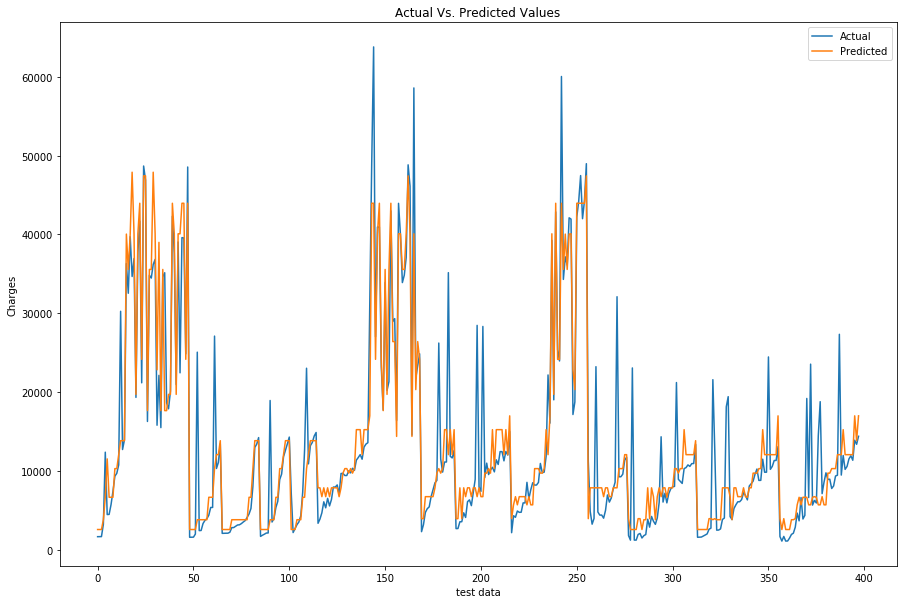

In [53]:
# predicting the values using the model
dt_predictions = dt_model.transform(test_data)
dt_predictions.select('features','prediction','label').show(5)


df_m = dt_predictions.select('features','prediction','label').toPandas()

r = []
for i in range(len(df_m)):
    r.append(i)
r=np.array(r)


val1 = []
for i in range(len(df_m)):
    val1.append(df_m.label[i])
val1=np.array(val1)
               
val2 = []
for i in range(len(df_m)):
    val2.append(df_m.prediction[i])
val2=np.array(val2)
               
plt.figure(figsize=(15,10))
plt.plot(r,val1,label='Actual')
plt.plot(r,val2,label='Predicted')
plt.title('Actual Vs. Predicted Values')
plt.ylabel('Charges')
plt.xlabel('test data')
plt.legend()
plt.show()

In [54]:
# Evaluating the model
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mae')
print("MAE on test data: ", dt_evaluator.evaluate(dt_predictions))
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mse')
print("MSE on test data: ", dt_evaluator.evaluate(dt_predictions))
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='rmse')
print("RMSE on test data: ", dt_evaluator.evaluate(dt_predictions))
dt_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", dt_evaluator.evaluate(dt_predictions))

MAE on test data:  2794.477115130764
MSE on test data:  26441953.712658275
RMSE on test data:  5142.174025901717
R Squared on test data:  0.831788831507009


#### The overall accuracy of the Decision Tree Regression Model is ~83%

#### Decision Tree Regression Model Tuning

In [55]:
# Defining pararmeter grid to construct a grid of parameters
paramGrid = (ParamGridBuilder().addGrid(dt.maxDepth,[2,5,10,20,30]).addGrid(dt.maxBins, [10,20,40,80,100]).build())
cv2 = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=RegressionEvaluator(), numFolds=3)

In [56]:
# Cross Validation implements all combinations to find the best model
cvModel2 = cv2.fit(train_data)
cv_dt_predictions = cvModel2.transform(test_data)
cv_dt_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1694.7964|
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1702.4553|
|(8,[0,1,5,6],[1.9...|2603.5772756976744| 1705.6245|
|(8,[0,1,5,6],[1.9...| 3845.657855370372|3268.84665|
|(8,[0,1,5,6],[1.9...|      13084.784255|12404.8791|
+--------------------+------------------+----------+
only showing top 5 rows



In [57]:
# Evaluating the tuned model using R Squared value
dt1_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", dt1_evaluator.evaluate(cv_dt_predictions))

R Squared on test data:  0.8319417113773117


#### After model tuning the accuracy is same i.e. ~83%

## Implementing Random Forest Regression

In [58]:
# Importing LinearRegression and implementing the model
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_data)

In [59]:
# predicting the values using the model
rf_predictions = rf_model.transform(train_data)
rf_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...|4532.4809388143385| 1704.5681|
|(8,[0,1,5,6],[1.9...|4532.4809388143385|1704.70015|
|(8,[0,1,5,6],[1.9...| 4291.215089638003| 1708.0014|
|(8,[0,1,5,6],[1.9...| 4291.215089638003|1708.92575|
|(8,[0,1,5,6],[1.9...| 4266.445070260137|  1712.227|
+--------------------+------------------+----------+
only showing top 5 rows



In [60]:
# Obtaining summary of trained model
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mae')
print("MAE on train data: ", rf_evaluator.evaluate(rf_predictions))
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mse')
print("MSE on train data: ", rf_evaluator.evaluate(rf_predictions))
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='rmse')
print("RMSE on train data: ", rf_evaluator.evaluate(rf_predictions))
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on train data: ", rf_evaluator.evaluate(rf_predictions))

MAE on train data:  2837.756936056931
MSE on train data:  19224765.82206194
RMSE on train data:  4384.605549198462
R Squared on train data:  0.8646405751940088


+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...| 4341.064566954859| 1694.7964|
|(8,[0,1,5,6],[1.9...|4532.4809388143385| 1702.4553|
|(8,[0,1,5,6],[1.9...|4532.4809388143385| 1705.6245|
|(8,[0,1,5,6],[1.9...| 6357.858333294845|3268.84665|
|(8,[0,1,5,6],[1.9...| 6814.131215542038|12404.8791|
+--------------------+------------------+----------+
only showing top 5 rows



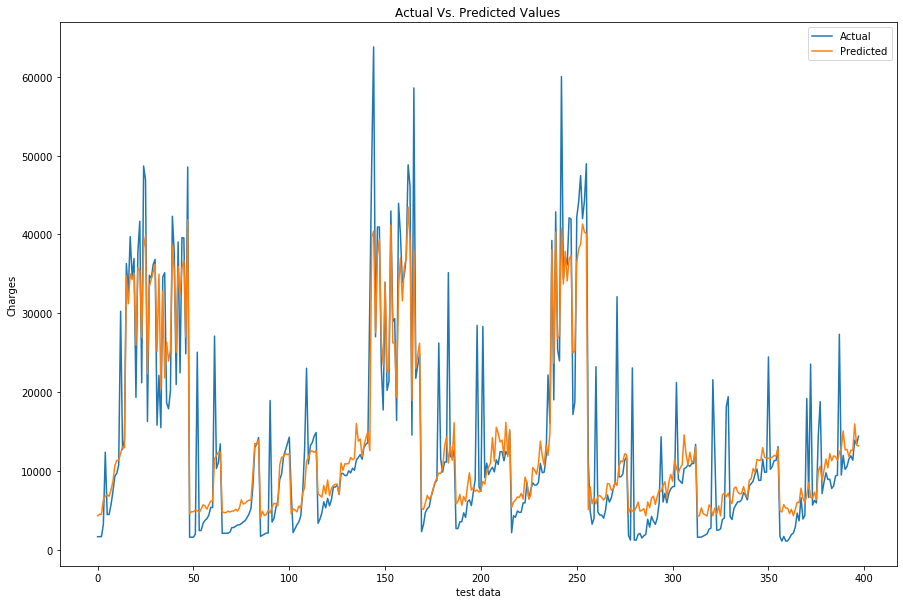

In [61]:
# predicting the values using the model
rf_predictions = rf_model.transform(test_data)
rf_predictions.select('features','prediction','label').show(5)

df_m = rf_predictions.select('features','prediction','label').toPandas()

r = []
for i in range(len(df_m)):
    r.append(i)
r=np.array(r)


val1 = []
for i in range(len(df_m)):
    val1.append(df_m.label[i])
val1=np.array(val1)
               
val2 = []
for i in range(len(df_m)):
    val2.append(df_m.prediction[i])
val2=np.array(val2)
               
plt.figure(figsize=(15,10))
plt.plot(r,val1,label='Actual')
plt.plot(r,val2,label='Predicted')
plt.title('Actual Vs. Predicted Values')
plt.ylabel('Charges')
plt.xlabel('test data')
plt.legend()
plt.show()

In [62]:
# Evaluating the model
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mae')
print("MAE on test data: ", rf_evaluator.evaluate(rf_predictions))
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='mse')
print("MSE on test data: ", rf_evaluator.evaluate(rf_predictions))
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='rmse')
print("RMSE on test data: ", rf_evaluator.evaluate(rf_predictions))
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", rf_evaluator.evaluate(rf_predictions))

MAE on test data:  3284.9876174829396
MSE on test data:  27902643.990685057
RMSE on test data:  5282.295333534945
R Squared on test data:  0.8224966127419632


#### The overall accuracy of the Random Forest Regression Model is ~82%

#### Random Forest Regression Model Tuning

In [63]:
# Defining pararmeter grid to construct a grid of parameters
paramGrid = (ParamGridBuilder().addGrid(rf.numTrees,[2,5,10,20]).addGrid(rf.maxDepth, [5,10,15,20]).build())
cv3 = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=RegressionEvaluator(), numFolds=5)

In [64]:
# Cross Validation implements all combinations to find the best model
cvModel3 = cv3.fit(train_data)
cv_rf_predictions = cvModel3.transform(test_data)
cv_rf_predictions.select('features','prediction','label').show(5)

+--------------------+------------------+----------+
|            features|        prediction|     label|
+--------------------+------------------+----------+
|(8,[0,1,5,6],[1.9...| 2176.016001862956| 1694.7964|
|(8,[0,1,5,6],[1.9...|2146.5841847558127| 1702.4553|
|(8,[0,1,5,6],[1.9...| 2233.747000537559| 1705.6245|
|(8,[0,1,5,6],[1.9...| 5568.994244385822|3268.84665|
|(8,[0,1,5,6],[1.9...| 6831.930802934058|12404.8791|
+--------------------+------------------+----------+
only showing top 5 rows



In [65]:
# Evaluating the tuned model using R Squared value
rf1_evaluator = RegressionEvaluator(predictionCol = 'prediction',labelCol='label',metricName='r2')
print("R Squared on test data: ", rf1_evaluator.evaluate(cv_rf_predictions))

R Squared on test data:  0.82026278059936


#### After model tuning the accuracy is same i.e. ~82%

## Comparing Models for selecting the best model

In [66]:
model_dict = {"Model": 
              ['Linear Regression','Gradient Boosted Tree Regression','Decision Tree Regression','Random Forest Regression'], 
              "R-squared before model tuning": 
              [res.r2*100,gbt_evaluator.evaluate(gbt_predictions)*100,dt_evaluator.evaluate(dt_predictions)*100,rf_evaluator.evaluate(gbt_predictions)*100],
              "R-squared after model tuning": 
              [lm1_evaluator.evaluate(cv_lm_predictions)*100,gbt1_evaluator.evaluate(cv_gbt_predictions)*100,dt1_evaluator.evaluate(cv_dt_predictions)*100,rf1_evaluator.evaluate(cv_rf_predictions)*100]
             }
model_df = pd.DataFrame(model_dict)
model_df

,Model,R-squared before model tuning,R-squared after model tuning
0,Linear Regression,74.701822,74.711402
1,Gradient Boosted Tree Regression,80.903920,83.908805
2,Decision Tree Regression,83.178883,83.194171
3,Random Forest Regression,80.903920,82.026278


#### Gradient Boosted Tree Regression is the best model as per the above results

In [103]:
##############################################End of File#########################################################